<a href="https://colab.research.google.com/github/lukewilley/dasa_2p08_data_challenge/blob/main/data_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Which time of day has the highest average workout duration?
2. How does membership type affect gym usage frequency?
3. What is the average calories burned by workout type?
4. Which age group visits the gym most frequently?
5. Is there a correlation between workout duration and calories burned?
6. How does gym usage vary by day of the week?

In [ ]:
from google.colab import drive
drive.mount('/content/drive') # Mount Google Drive to access files

Mounted at /content/drive


In [54]:
import pandas as pd # Import pandas for data manipulation and analysis
import numpy as np # Import numpy for numerical operations
import matplotlib.pyplot as plt # Import matplotlib for plotting and visualization
import seaborn as sns # Import seaborn for enhanced data visualization

sns.set(style="whitegrid") # Set the seaborn style for plots to 'whitegrid' for better aesthetics

df = pd.read_csv("/content/sample_data/team05_gym.csv") # Load the dataset from the specified CSV file into a pandas DataFrame
print("Initial dataset Shape: ", df.shape) # Print the initial shape (number of rows, number of columns) of the DataFrame
df.head() # Display the first 5 rows of the DataFrame to get a quick overview of the data

Initial dataset Shape:  (900, 9)


,visit_id,member_id,date,time_of_day,duration_minutes,membership_type,age_group,workout_type,calories_burned
0,1,49,2023-11-13,Evening,87.0,Basic,26-35,Cardio,309.0
1,2,88,2023-11-08,Morning,NaN,Basic,36-50,Cardio,NaN
2,3,115,2023-12-24,Morning,73.0,Premium,18-25,Classes,273.0
3,4,44,2023-09-26,Morning,15.0,Premium,36-50,Mixed,398.0
4,5,36,2023-10-09,Morning,15.0,VIP,36-50,Cardio,260.0


First we need to clean the dataset. We can see that the table has two columns that contain some missing values. duration_minutes has 850/900 non-null values. calories_burned has 865/900 non-null values.

In [55]:
# Display missing values after filling to confirm
print("\n Missing values: " ) # Print a header for missing values information
print(df.isnull().sum()) # Count and display the number of missing (NaN) values in each column of the DataFrame

# Handle missing values by filling with the mean for numerical columns
df['calories_burned'] = df['calories_burned'].fillna(df['calories_burned'].mean()) # Fill missing values in 'calories_burned' column with the mean of that column

df['duration_minutes'] = df['duration_minutes'].fillna(
    df.groupby(['workout_type', 'age_group'])['duration_minutes'].transform('median')
)
print(df['duration_minutes'][21])
print("Final dataset Shape: ", df.shape) # Print the final shape of the DataFrame after handling missing values
df.head() # Display the first 5 rows of the DataFrame to show changes


 Missing values: 
visit_id             0
member_id            0
date                 0
time_of_day          0
duration_minutes    50
membership_type      0
age_group            0
workout_type         0
calories_burned     35
dtype: int64
46.5
Final dataset Shape:  (900, 9)


,visit_id,member_id,date,time_of_day,duration_minutes,membership_type,age_group,workout_type,calories_burned
0,1,49,2023-11-13,Evening,87.0,Basic,26-35,Cardio,309.000000
1,2,88,2023-11-08,Morning,49.0,Basic,36-50,Cardio,296.978035
2,3,115,2023-12-24,Morning,73.0,Premium,18-25,Classes,273.000000
3,4,44,2023-09-26,Morning,15.0,Premium,36-50,Mixed,398.000000
4,5,36,2023-10-09,Morning,15.0,VIP,36-50,Cardio,260.000000


For the columns 'age_group', 'time_of_day', 'membership_type' we can logically order the categories from lowest to highest.

In [ ]:
age_group_order = ['18-25', '26-35', '36-50', '50+'] # Define the desired order for the 'age_group' categories
df['age_group'] = pd.Categorical( # Convert 'age_group' column to a pandas Categorical type
    df['age_group'],
    categories=age_group_order, # Apply the defined order
    ordered=True # Indicate that the categories have a meaningful order
)

time_of_day_order = ['Morning', 'Afternoon', 'Evening'] # Define the desired order for the 'time_of_day' categories
df['time_of_day'] = pd.Categorical( # Convert 'time_of_day' column to a pandas Categorical type
    df['time_of_day'],
    categories=time_of_day_order, # Apply the defined order
    ordered=True # Indicate that the categories have a meaningful order
)

membership_type_order = ['Basic', 'Premium', 'VIP'] # Define the desired order for the 'membership_type' categories
df['membership_type'] = pd.Categorical( # Convert 'membership_type' column to a pandas Categorical type
    df['membership_type'],
    categories=membership_type_order, # Apply the defined order
    ordered=True # Indicate that the categories have a meaningful order
)

# Display DataFrame info to show the updated column types
print("\nColumn types after categorical conversion:") # Print a header for column types
print(df[['age_group', 'time_of_day', 'membership_type']].dtypes) # Display the data types of the converted columns


Column types after categorical conversion:
age_group          category
time_of_day        category
membership_type    category
dtype: object


This code converts the age_group, time_of_day, and membership_type columns into ordered pandas categorical variables with predefined category sequences. This ensures consistent sorting, comparison, and analysis based on a meaningful logical order rather than default alphabetical ordering.

1. Which time of day has the highest average workout duration?


Average Workout Duration by time of the day
time_of_day
Morning      58.918594
Afternoon    58.309412
Evening      56.653595
Name: duration_minutes, dtype: float64


/tmp/ipython-input-323/1759401384.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  q1 = df.groupby('time_of_day')['duration_minutes'].mean() # Group data by 'time_of_day', calculate the mean of 'duration_minutes', and sort in descending order


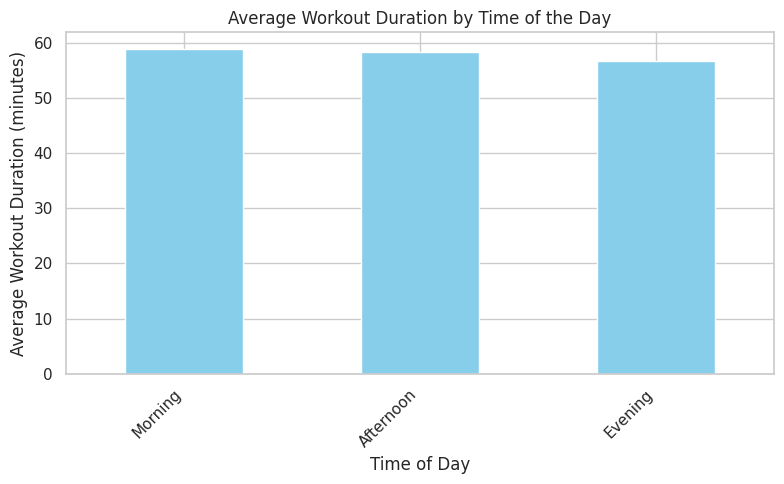

In [ ]:
# Calculate the average workout duration for each time of day
q1 = df.groupby('time_of_day')['duration_minutes'].mean() # Group data by 'time_of_day', calculate the mean of 'duration_minutes', and sort in descending order
print("\nAverage Workout Duration by time of the day") # Print a header for the results
print(q1) # Display the calculated average workout durations

#plot the results
plt.figure(figsize=(8, 5)) # Create a new figure for the plot with a specified size
q1.plot(kind='bar', color='skyblue') # Generate a bar plot from the 'q1' series, setting the color
plt.title('Average Workout Duration by Time of the Day') # Set the title of the plot
plt.xlabel('Time of Day') # Set the label for the x-axis
plt.ylabel('Average Workout Duration (minutes)') # Set the label for the y-axis
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability and align them to the right
plt.tight_layout() # Adjust plot to ensure everything fits without overlapping
plt.show() # Display the plot

This code groups the dataset by time_of_day, calculates the mean workout duration (duration_minutes) for each group, and sorts the results in descending order to identify which time of day has the longest average workouts. It then visualizes these averages using a bar chart for clear comparison across time periods.

2. How does membership type affect gym usage frequency?


Average Visit Frequency by Membership Type
membership_type
Basic      2.352041
Premium    1.484694
VIP        0.755102
Name: visit_count, dtype: float64


/tmp/ipython-input-323/1384293343.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  member_usage = df.groupby(['member_id','membership_type']).size().reset_index(name='visit_count') # Group by member_id and membership_type, count occurrences, and reset index to create a DataFrame with 'visit_count'
/tmp/ipython-input-323/1384293343.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  q2 = member_usage.groupby('membership_type')['visit_count'].mean() # Group the 'member_usage' data by 'membership_type', calculate the mean 'visit_count', and sort in descending order


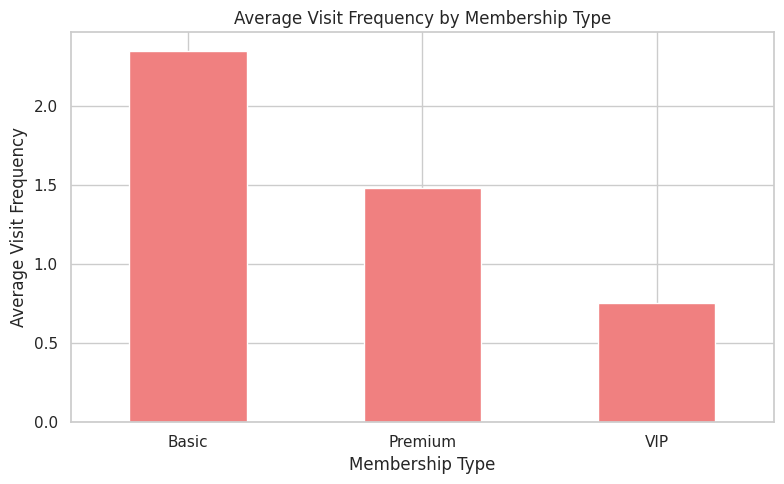

In [ ]:
# Calculate the number of visits for each member and membership type
member_usage = df.groupby(['member_id','membership_type']).size().reset_index(name='visit_count') # Group by member_id and membership_type, count occurrences, and reset index to create a DataFrame with 'visit_count'

# Calculate average visit frequency by membership type from the 'member_usage' DataFrame
q2 = member_usage.groupby('membership_type')['visit_count'].mean() # Group the 'member_usage' data by 'membership_type', calculate the mean 'visit_count', and sort in descending order
print("\nAverage Visit Frequency by Membership Type") # Print a header for the results
print(q2) # Display the calculated average visit frequencies

#plot the results
plt.figure(figsize=(8, 5)) # Create a new figure for the plot with a specified size
q2.plot(kind='bar', color='lightcoral') # Generate a bar plot from the 'q2' series, setting the color
plt.title('Average Visit Frequency by Membership Type') # Set the title of the plot
plt.xlabel('Membership Type') # Set the label for the x-axis
plt.ylabel('Average Visit Frequency') # Set the label for the y-axis
plt.xticks(rotation=0) # Ensure x-axis labels are not rotated
plt.tight_layout() # Adjust plot to ensure everything fits without overlapping
plt.show() # Display the plot

This code first calculates how many times each member visits by grouping the data by member_id and membership_type. It then computes the average visit frequency for each membership type and visualizes the results in a bar chart to compare engagement levels across membership tiers.

3. What is the average calories burned by workout type?


Average Calories Burned by Workout Type
workout_type
Weights    304.129471
Classes    299.853885
Cardio     293.082647
Mixed      290.728373
Name: calories_burned, dtype: float64


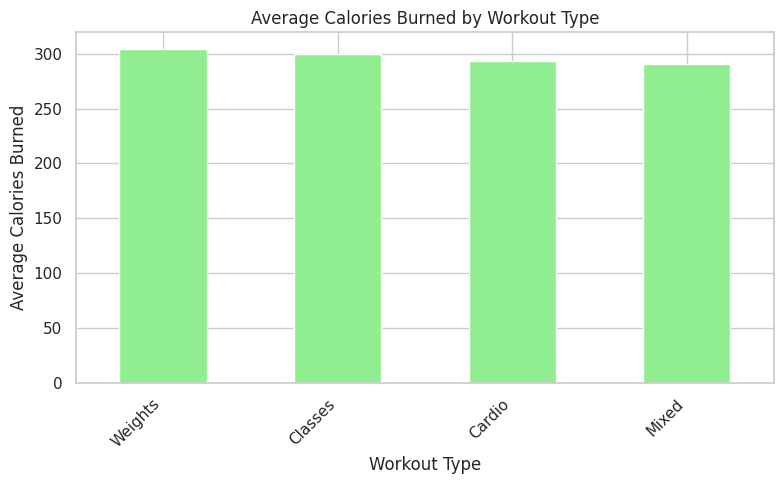

In [ ]:
# Calculate the average calories burned for each workout type
q3 = df.groupby('workout_type')['calories_burned'].mean().sort_values(ascending=False) # Group data by 'workout_type', calculate the mean of 'calories_burned', and sort in descending order
print("\nAverage Calories Burned by Workout Type") # Print a header for the results
print(q3) # Display the calculated average calories burned

#plot the results
plt.figure(figsize=(8, 5)) # Create a new figure for the plot with a specified size
q3.plot(kind='bar', color='lightgreen') # Generate a bar plot from the 'q3' series, setting the color
plt.title('Average Calories Burned by Workout Type') # Set the title of the plot
plt.xlabel('Workout Type') # Set the label for the x-axis
plt.ylabel('Average Calories Burned') # Set the label for the y-axis
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability and align them to the right
plt.tight_layout() # Adjust plot to ensure everything fits without overlapping
plt.show() # Display the plot

This code groups the dataset by workout_type, computes the average calories_burned for each type, and sorts the results in descending order to identify which workouts burn the most calories on average. It then presents the comparison visually using a bar chart for clearer interpretation of calorie intensity across workout types. The workout types are sorted by highest average calories burned. Weights has the highest average calories burned.

4. Which age group visits the gym most frequently?


Number of Visits by Age Group
age_group
18-25    238
26-35    320
36-50    215
50+      127
dtype: int64


/tmp/ipython-input-323/70813073.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  q4 = df.groupby('age_group').size() # Group data by 'age_group' and count the number of entries in each group (i.e., visits)


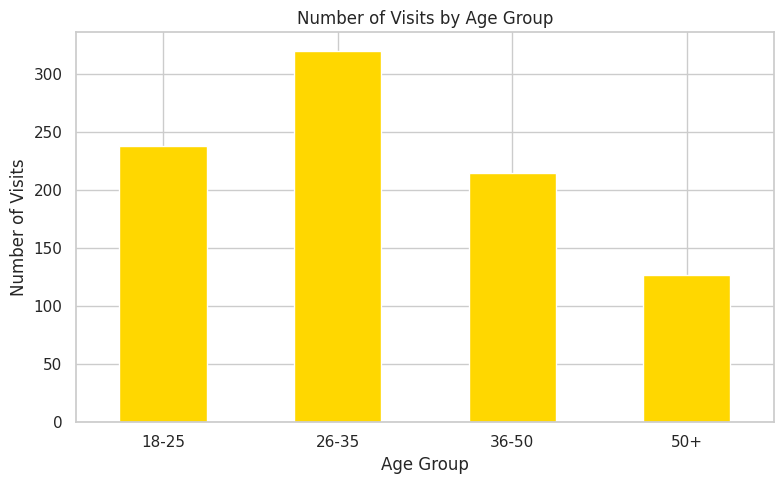

In [ ]:
# Calculate the number of visits for each age group
q4 = df.groupby('age_group').size() # Group data by 'age_group' and count the number of entries in each group (i.e., visits)
print("\nNumber of Visits by Age Group") # Print a header for the results
print(q4) # Display the count of visits per age group

plt.figure(figsize=(8, 5)) # Create a new figure for the plot with a specified size
q4.plot(kind='bar', color='gold') # Generate a bar plot from the 'q4' series, setting the color
plt.title('Number of Visits by Age Group') # Set the title of the plot
plt.ylabel('Number of Visits') # Set the label for the y-axis
plt.xlabel('Age Group') # Set the label for the x-axis
plt.xticks(rotation=0) # Ensure x-axis labels are not rotated
plt.tight_layout() # Adjust plot to ensure everything fits without overlapping
plt.show() # Display the plot

The code groups the dataset by age group. We track how many times each age group visits. The age range that most frequently visits the gym according to our table is ages 26-35 as they have the most number of visits which is 320.

5. Is there a correlation between workout duration and calories burned?


Correlation between Workout Duration and Calories Burned
Correlation Coefficient: -0.02861194835864796


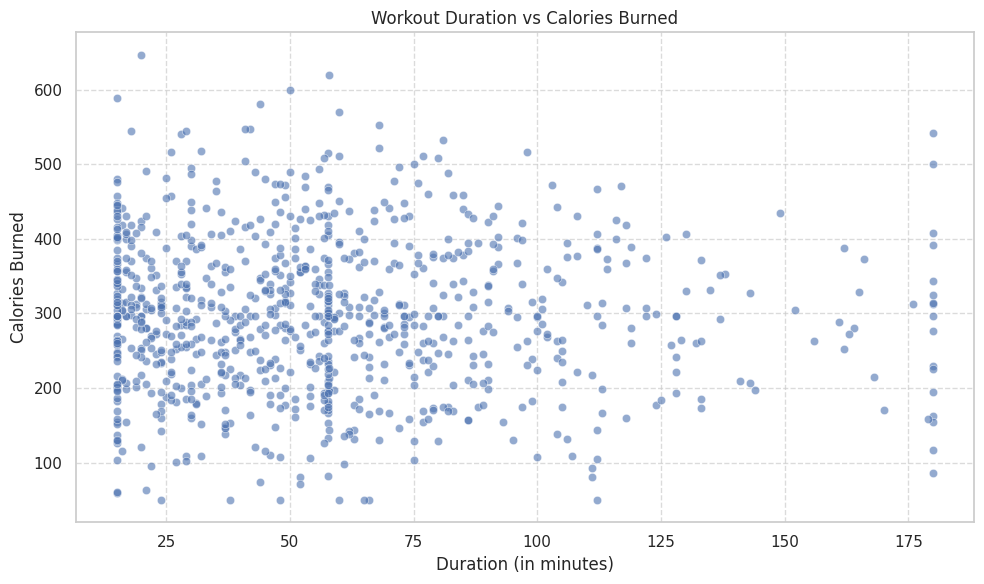

In [ ]:
correlation = df['duration_minutes'].corr(df['calories_burned']) # Calculate the Pearson correlation coefficient between 'duration_minutes' and 'calories_burned'
print("\nCorrelation between Workout Duration and Calories Burned") # Print a header for the correlation result
print("Correlation Coefficient:",correlation) # Display the calculated correlation coefficient

#scatter plot to visualize the correlation
plt.figure(figsize=(10, 6)) # Create a new figure for the plot with a specified size
sns.scatterplot(x = 'duration_minutes', y = 'calories_burned', data = df, alpha=0.6) # Generate a scatter plot using seaborn to show the relationship between duration and calories burned
plt.title("Workout Duration vs Calories Burned") # Set the title of the plot
plt.ylabel('Calories Burned') # Set the label for the y-axis
plt.xlabel('Duration (in minutes)') # Set the label for the x-axis
plt.grid(True, linestyle='--', alpha=0.7) # Add a grid to the plot for better readability
plt.tight_layout() # Adjust plot to ensure everything fits without overlapping
plt.show() # Display the plot

We calculate the correlation using df[x_value].corr(df[y_value], where x is duration and y is calories burned. There is very low correlation between workout duration and calories burned according to our data. r = -0.0286 means a very weak, almost non-existent linear relationship.

6. How does gym usage vary by day of the week?


Gym Usage Frequency by Day of the Week
day_of_week
Monday       130
Tuesday      136
Wednesday    101
Thursday     140
Friday       130
Saturday     133
Sunday       130
dtype: int64


/tmp/ipython-input-323/920905958.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  q6 = df.groupby('day_of_week').size() # Group data by 'day_of_week' and count the number of entries in each group (i.e., visits)


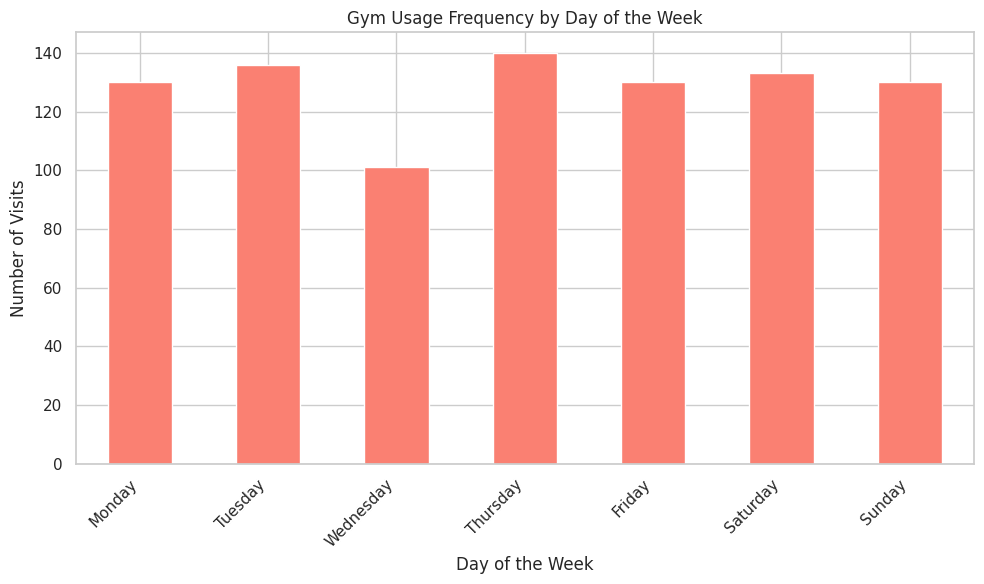

In [ ]:
# Convert 'date' column to datetime objects if not already done
df['date'] = pd.to_datetime(df['date']) # Ensure the 'date' column is in datetime format

# Extract the day of the week and assign to a new column 'day_of_week'
df['day_of_week'] = df['date'].dt.day_name() # Extract the day name (e.g., 'Monday') from the 'date' column

# Define the desired order for the days of the week
week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_of_week'] = pd.Categorical( # Convert 'day_of_week' column to a pandas Categorical type
    df['day_of_week'],
    categories=week_order, # Apply the defined order
    ordered=True # Indicate that the categories have a meaningful order
)

# Calculate gym usage frequency by day of the week (count of visits)
q6 = df.groupby('day_of_week').size() # Group data by 'day_of_week' and count the number of entries in each group (i.e., visits)

print("\nGym Usage Frequency by Day of the Week") # Print a header for the results
print(q6) # Display the count of visits per day of the week

#plot the results
plt.figure(figsize=(10, 6)) # Create a new figure for the plot with a specified size
q6.plot(kind='bar', color='salmon') # Generate a bar plot from the 'q6' series, setting the color
plt.title('Gym Usage Frequency by Day of the Week') # Set the title of the plot
plt.ylabel('Number of Visits') # Set the label for the y-axis
plt.xlabel('Day of the Week') # Set the label for the x-axis
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability and align them to the right
plt.tight_layout() # Adjust plot to ensure everything fits without overlapping
plt.show() # Display the plot

This code converts the date column to datetime format, extracts the corresponding day of the week, and sets it as an ordered categorical variable to preserve the natural Monday–Sunday sequence. It then calculates the total number of gym visits per day and visualizes the weekly usage pattern using a bar chart.

Final Summary

In [ ]:
df.head()

,visit_id,member_id,date,time_of_day,duration_minutes,membership_type,age_group,workout_type,calories_burned,day_of_week
0,1,49,2023-11-13,Evening,87.000000,Basic,26-35,Cardio,309.000000,Monday
1,2,88,2023-11-08,Morning,57.815294,Basic,36-50,Cardio,296.978035,Wednesday
2,3,115,2023-12-24,Morning,73.000000,Premium,18-25,Classes,273.000000,Sunday
3,4,44,2023-09-26,Morning,15.000000,Premium,36-50,Mixed,398.000000,Tuesday
4,5,36,2023-10-09,Morning,15.000000,VIP,36-50,Cardio,260.000000,Monday


In [ ]:
print("Final Summary") # Print a header for the final summary

print("\n1) Highest Workout Duration Time:", q1.idxmax()) # Print the time of day with the highest average workout duration, using idxmax() to get the index (category) with the maximum value
print("2) Highest Usage Membership Type:", q2.idxmax()) # Print the membership type with the highest average visit frequency
print("3) Highest Calorie Burn Workout:", q3.idxmax()) # Print the workout type with the highest average calories burned
print("4) Most Frequent Visiting Age Group:", q4.idxmax()) # Print the age group with the most frequent visits
print("5) Correlation (Duration vs Calories):", correlation) # Print the calculated correlation coefficient between workout duration and calories burned
print("6) Most Active Day:", q6.idxmax()) # Print the day of the week with the most gym visits

Final Summary

1) Highest Workout Duration Time: Morning
2) Highest Usage Membership Type: Basic
3) Highest Calorie Burn Workout: Weights
4) Most Frequent Visiting Age Group: 26-35
5) Correlation (Duration vs Calories): -0.02861194835864796
6) Most Active Day: Thursday


#  Gym Member Attendance Analysis

##  Project Overview
This project analyzes gym attendance data from `team05_gym.csv` to uncover usage patterns, demographic insights, and workout performance trends.

The analysis answers six key analytical questions using Python (Pandas, Matplotlib, Seaborn).

---

##  Dataset Description

The dataset intially includes:
- VisitID
- MemberID
- Date
- TimeOfDay
- WorkoutDuration (minutes)
- MembershipType
- AgeGroup
- WorkoutType
- CaloriesBurned

And added the column to answer question 6:
- DayOfWeek

---

##  Data Cleaning Process

The following preprocessing steps were performed:

- Missing value detection and filling in missing values with the mean
- Data consistency with date formatting (mm/dd/yyyy to yyyy-mm-dd)
- Age grouping for demographic analysis
- Logically ordered categories for applicable columns

---

##  Questions Answered

1. Which time of day has the highest average workout duration?
2. How does membership type affect gym usage frequency?
3. What is the average calories burned by workout type?
4. Which age group visits the gym most frequently?
5. Is there a correlation between workout duration and calories burned?
6. How does gym usage vary by day of the week?

---

##  Key Findings

- Identified peak workout time by duration is morning.
- Determined most frequently visited membership type is Basic.
- Found highest calorie-burning workout is weights.
- Identified most active age demographic is 26-35.
- Established correlation between workout duration and calories burned is very weak (r=-0.0286).
- Determined most active day of the week is Thursday.

---

##  Technologies Used

- Python
- Pandas
- NumPy
- Matplotlib
- Seaborn

---

## ▶ How to Run
- Open data_challenge.ipynb on git repository
- Open in Colab